Importing Required Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline 

Importing Dataset

In [51]:
url="https://raw.githubusercontent.com/VinayakaShivakumar/ML_Dataset/main/Naive_Bayes_Dataset/SMS_spam_filtering.csv"
data=pd.read_csv(url, encoding='latin-1')

Reading the Dataset

In [52]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


Visulazing SPAM and NOT SPAM SMS from the data set

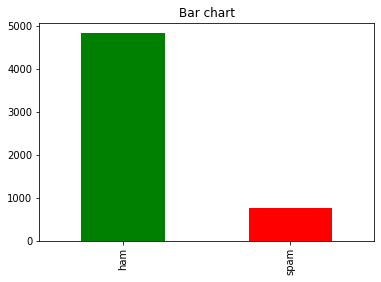

In [53]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["Green", "Red"])
plt.title('Bar chart')
plt.show()

Visulazing Percentange of SPAM and NOT SPAM SMS in the data set

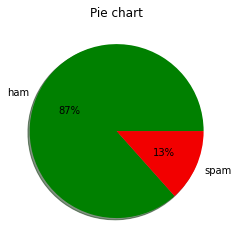

In [54]:
colors = ['#008000', '#f20000']
count_Class.plot(kind = 'pie',  autopct='%1.0f%%',shadow=True, colors=colors)
plt.title('Pie chart')
plt.ylabel('')
plt.show()

Analyzing words in SPAM and NOT SPAM SMS using counter function

In [55]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

Visualizing Frequently used words in NOT SPAM SMS

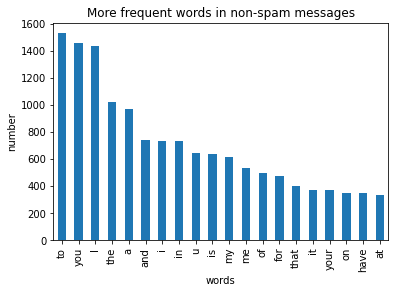

In [56]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Visualizing Frequently used words in SPAM SMS

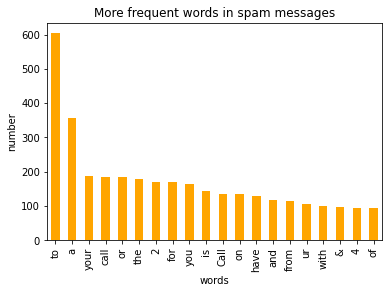

In [57]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

By reviewing the above graphs we see that most of the words classified as SPAM and NOT SPAM are stop words such as 'to', 'a', 'or' and so on. Hence removing stop words and creating a new vectors with the extracted words

In [58]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

Transforming the vector SPAM/NOT SPAM into binary variable.

In [59]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})

Splitting data for training and testing

In [60]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.20, random_state=15)
print([np.shape(X_train), np.shape(X_test)])

[(4457, 8404), (1115, 8404)]


# Using Multinomial naive bayes classifier

Training different bayes models changing the regularization parameter (alpha).


In [61]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

Evaluating the accuracy, recall and precision of the model with the test set.

In [62]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.996410,0.972197,0.886364,0.879699
1,0.11001,0.995737,0.975785,0.931818,0.872340
2,0.22001,0.996186,0.976682,0.931818,0.878571
3,0.33001,0.995961,0.977578,0.939394,0.879433
4,0.44001,0.996186,0.978475,0.939394,0.885714
5,0.55001,0.995737,0.978475,0.939394,0.885714
6,0.66001,0.995737,0.976682,0.931818,0.878571
7,0.77001,0.995513,0.976682,0.931818,0.878571
8,0.88001,0.995288,0.974888,0.924242,0.871429
9,0.99001,0.995288,0.974888,0.924242,0.871429


Selecting the model with the most test precision

In [63]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             16.830010
Train Accuracy     0.978236
Test Accuracy      0.974888
Test Recall        0.787879
Test Precision     1.000000
Name: 153, dtype: float64

Checking other models with 100% precission

In [64]:
models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
153,16.83001,0.978236,0.974888,0.787879,1.0
154,16.94001,0.978236,0.973991,0.780303,1.0
155,17.05001,0.978236,0.973991,0.780303,1.0
156,17.16001,0.978236,0.973991,0.780303,1.0
157,17.27001,0.978012,0.973991,0.780303,1.0


Upon reviewing the above models - Selecting the model with highest test accuracy and 100% test precission

In [65]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             16.830010
Train Accuracy     0.978236
Test Accuracy      0.974888
Test Recall        0.787879
Test Precision     1.000000
Name: 153, dtype: float64

Visualizing the Actual HAM/ Actual SPAM VS Predicted HAM/Predicted SPAM using heat map

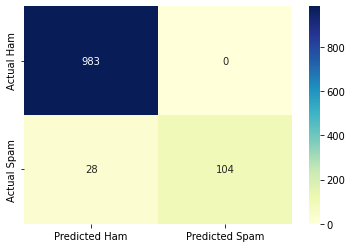

In [66]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

cm_matrix = pd.DataFrame(data=m_confusion_test, columns=['Predicted Ham', 'Predicted Spam'], 
                                 index=['Actual Ham', 'Actual Spam'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')